## Import Libraries

In [89]:
import pandas as pd
import numpy as np
import googlemaps
import gmaps
import gmaps.datasets
import gmaps.geojson_geometries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from IPython.display import Image

from geographiclib.geodesic import Geodesic
from IPython.display import display

## Access Keys

In [4]:
f = open('gmap_api_key.txt', 'r')
my_api_key = f.read()
f.close()

# Set up Gmaps API client
gmaps.configure(api_key=my_api_key)

# Set up Google Maps API client
gms = googlemaps.Client(key=my_api_key)

## Import dataset

In [5]:
df = pd.read_csv(r'Border_Crossing_Entry_Data.csv')

## Dataframe Exploration

In [6]:
df.sample(10)

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
236780,Scobey,Montana,3309,US-Canada Border,Aug 2007,Trains,0,49.000,-105.408,POINT (-105.407638 48.999527)
9219,Derby Line,Vermont,209,US-Canada Border,Jan 2021,Personal Vehicles,2449,45.006,-72.099,POINT (-72.099279 45.005739)
165355,Van Buren,Maine,108,US-Canada Border,Nov 2009,Personal Vehicle Passengers,29414,47.160,-67.931,POINT (-67.930799 47.159645)
376919,Sherwood,North Dakota,3414,US-Canada Border,Jun 1997,Rail Containers Empty,0,48.999,-101.628,POINT (-101.627527 48.999305)
237655,St John,North Dakota,3405,US-Canada Border,Sep 2006,Truck Containers Loaded,143,48.999,-99.659,POINT (-99.659111 48.999277)
116253,Grand Portage,Minnesota,3613,US-Canada Border,Nov 2013,Pedestrians,0,48.001,-89.585,POINT (-89.58515 48.001427)
236328,Danville,Washington,3012,US-Canada Border,Sep 2007,Personal Vehicles,5136,49.000,-118.504,POINT (-118.503722 49.000083)
347527,Blaine,Washington,3004,US-Canada Border,Mar 1998,Bus Passengers,28052,48.994,-122.749,POINT (-122.748884 48.994045)
227250,International Falls,Minnesota,3604,US-Canada Border,Jun 2007,Trains,339,48.608,-93.401,POINT (-93.401355 48.6078)
352099,Detroit,Michigan,3801,US-Canada Border,Jan 1998,Rail Containers Empty,4973,42.332,-83.048,POINT (-83.047924 42.331685)


In [19]:
print(df.shape)
df.info()

(390305, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390305 entries, 0 to 390304
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  390305 non-null  object 
 1   State      390305 non-null  object 
 2   Port Code  390305 non-null  int64  
 3   Border     390305 non-null  object 
 4   Date       390305 non-null  object 
 5   Measure    390305 non-null  object 
 6   Value      390305 non-null  int64  
 7   Latitude   390305 non-null  float64
 8   Longitude  390305 non-null  float64
 9   Point      390305 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 29.8+ MB


In [9]:
df.describe()

,Port Code,Value,Latitude,Longitude
count,390305.000000,3.903050e+05,390305.000000,390305.000000
mean,2447.417522,2.868126e+04,43.982557,-99.745781
std,1203.813604,1.496351e+05,8.149411,18.255523
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2304.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.370000e+02,48.496000,-101.628000
75%,3401.000000,2.912000e+03,49.000000,-89.585000
max,3814.000000,4.447374e+06,62.615000,-66.980000


### US Border Crossing Heatmap

In [12]:
df_markers = df[['Latitude','Longitude']]

fig = gmaps.figure(center=(37.0902, -95.7129), map_type = 'HYBRID', zoom_level=4)

# Add Heatmap layer
heatmap_layer = gmaps.heatmap_layer(df_markers)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
3,Whitlash,Montana,3321,US-Canada Border,Jan 2024,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725)
4,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)


# Visualize the proportion of crossing types for both borders

In [21]:
df.Border.unique()

array(['US-Mexico Border', 'US-Canada Border'], dtype=object)

In [22]:
df.Measure.unique()

array(['Buses', 'Trucks', 'Pedestrians', 'Personal Vehicles',
       'Personal Vehicle Passengers', 'Truck Containers Loaded',
       'Truck Containers Empty', 'Rail Containers Empty',
       'Bus Passengers', 'Trains', 'Train Passengers',
       'Rail Containers Loaded'], dtype=object)

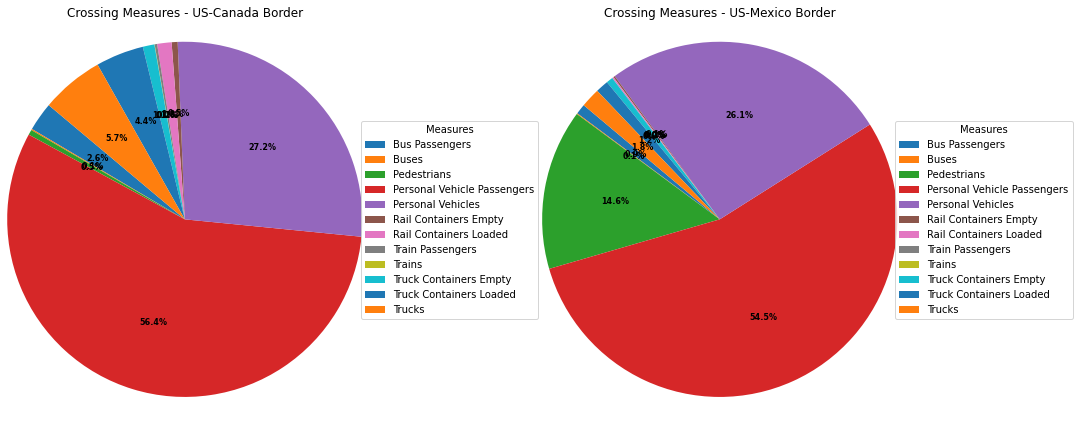

In [27]:
# Group by 'Border' and 'Measure' and sum the 'Value' for each group
grouped_df = df.groupby(['Border', 'Measure'])['Value'].sum().reset_index()

borders = grouped_df['Border'].unique()

# Define colors for each measure
colors = plt.cm.tab10.colors

# Create subplots for each border
fig, axes = plt.subplots(1, len(borders), figsize=(15, 6), sharey=True)

for i, border in enumerate(borders):
    border_data = grouped_df[grouped_df['Border'] == border]
    
    # Create a pie chart for the current border
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(border_data['Value'], colors=colors[:len(border_data)], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Crossing Measures - {border}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.legend(wedges, border_data['Measure'], title="Measures", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")

plt.tight_layout()
plt.show()

In [28]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
3,Whitlash,Montana,3321,US-Canada Border,Jan 2024,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725)
4,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)


### Border Crossings over Years

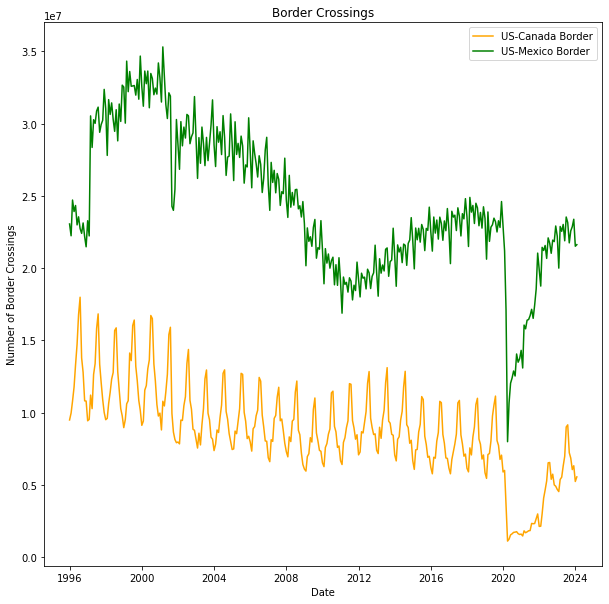

CPU times: user 282 ms, sys: 7.96 ms, total: 290 ms
Wall time: 289 ms


In [42]:
%%time 
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y')

grouped_df = df.groupby(['Date', 'Border'])['Value'].sum().reset_index()

# Plot vertical bar graph with different colors for each border
fig, ax = plt.subplots(figsize=(10, 10))

for border, color in [('US-Canada Border', 'orange'), ('US-Mexico Border', 'green')]:
    border_data = grouped_df[grouped_df['Border'] == border]
    ax.plot(border_data['Date'], border_data['Value'], label=border, color=color)

ax.set_title('Border Crossings')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Border Crossings')
ax.legend()
plt.show()

### Border Crossings by Month

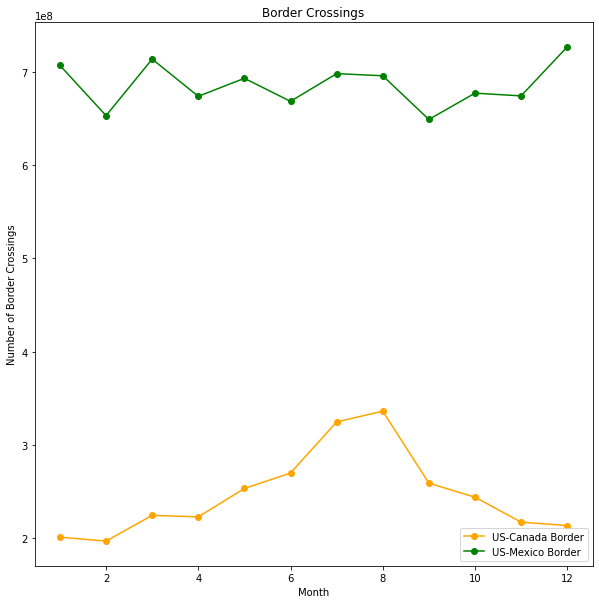

In [43]:
# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Month' and 'Border' and sum the 'Value' for each group
grouped_df = df.groupby(['Month', 'Border'])['Value'].sum().reset_index()

# Plot vertical bar graph with different colors for each border
fig, ax = plt.subplots(figsize=(10, 10))

for border, color in [('US-Canada Border', 'orange'), ('US-Mexico Border', 'green')]:
    border_data = grouped_df[grouped_df['Border'] == border]
    ax.plot(border_data['Month'], border_data['Value'], label=border, color=color, marker='o')

ax.set_title('Border Crossings')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Border Crossings')
ax.legend()
plt.show()

### Border Crossings Trends over Years (US-Mexico Border)

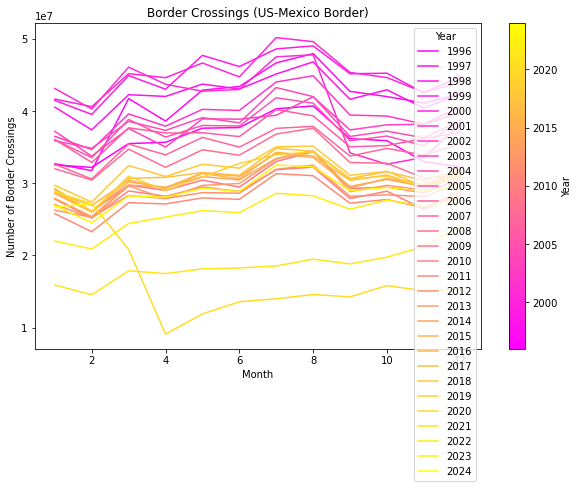

In [51]:
# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df2 = df[df['Border'] == 'US-Mexico Border']

# Group by 'Month' and 'Border' and sum the 'Value' for each group
grouped_df = df.groupby(['Year', 'Month'])['Value'].sum().reset_index()

# Plot line graph with different colors for each year
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique years
years = grouped_df['Year'].unique()

# Create a colormap
cmap = plt.cm.get_cmap('spring')

for i, year in enumerate(years):
    year_data = grouped_df[grouped_df['Year'] == year]
    color = cmap(i / (len(years) - 1))  # Get color from the colormap
    ax.plot(year_data['Month'], year_data['Value'], label=str(year), color=color)

ax.set_title('Border Crossings (US-Mexico Border)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Border Crossings')

# Add colorbar
sm = ScalarMappable(norm=Normalize(vmin=grouped_df['Year'].min(), vmax=grouped_df['Year'].max()), cmap=cmap)
sm.set_array([])  # dummy array for ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Year')

ax.legend(title='Year')
plt.show()

### Border Crossings Trends over Years (US-Canada Border)

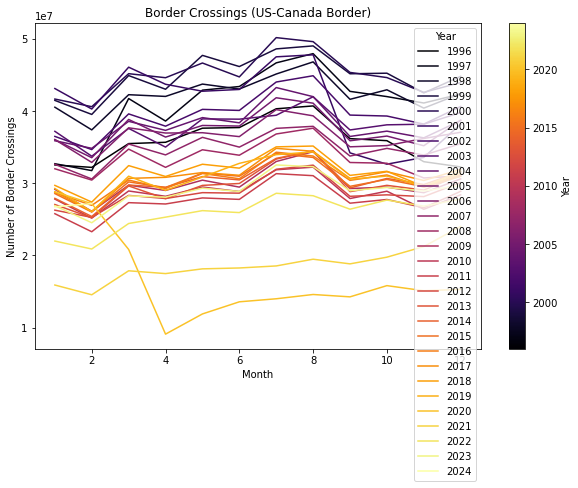

In [55]:
# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df2 = df[df['Border'] == 'US-Canada Border']

# Group by 'Month' and 'Border' and sum the 'Value' for each group
grouped_df = df.groupby(['Year', 'Month'])['Value'].sum().reset_index()

# Plot line graph with different colors for each year
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique years
years = grouped_df['Year'].unique()

# Create a colormap
cmap = plt.cm.get_cmap('inferno')

for i, year in enumerate(years):
    year_data = grouped_df[grouped_df['Year'] == year]
    color = cmap(i / (len(years) - 1))  # Get color from the colormap
    ax.plot(year_data['Month'], year_data['Value'], label=str(year), color=color)

ax.set_title('Border Crossings (US-Canada Border)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Border Crossings')

# Add colorbar
sm = ScalarMappable(norm=Normalize(vmin=grouped_df['Year'].min(), vmax=grouped_df['Year'].max()), cmap=cmap)
sm.set_array([])  # dummy array for ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Year')

ax.legend(title='Year')
plt.show()

### Summary Points

- With this dataset, I am able to explore several insights of border crossings between the US and neighboring countries Canada and Mexico.
    - In the first visualization, we can determine the geographical entry points for both borders. This helps us understand the number of ports and the entry scale for each border.
    - The monthly trend shows very little variation in months for the Mexico border, while there is a greater amount of border crossings during summer months for Canada. This summer emphasis could imply that Canada's crossings are more vacation-based, however we cannot make this conclusion without more data (directional crossing type, recorded reasons for crossing if any).
    - Most of all, we have seen a general decrease in border crossings over time for both borders. This is interesting to me, providing context for political discourse around harsher immigration policy in recent years.

## Predict number of crossings per month

### ARIMA

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:               364522
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -4893431.585
Date:                Tue, 30 Apr 2024   AIC                        9786875.169
Time:                        17:24:03   BIC                        9786940.007
Sample:                             0   HQIC                       9786893.768
                             - 364522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8341      0.001  -1150.017      0.000      -0.836      -0.833
ar.L2         -0.6656      0.001   -734.630      0.000      -0.667      -0.664
ar.L3         -0.4977      0.001   -517.669      0.0

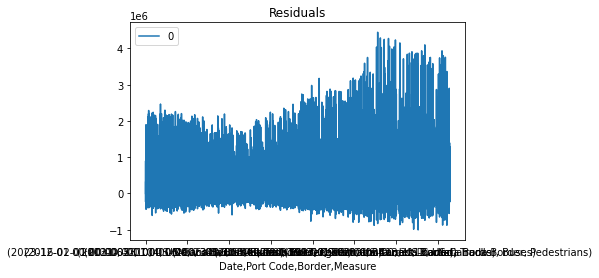

ARIMA Train RMSE: 163626.02398202525
CPU times: user 1min 28s, sys: 586 ms, total: 1min 29s
Wall time: 56.1 s


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [90]:
%%time

from statsmodels.tsa.arima.model import ARIMA

df2 = df.copy()

# Drop unnecessary columns
df2.drop(['Port Name', 'State', 'Latitude', 'Longitude', 'Point'], axis=1, inplace=True)

# Remove outlier years (Pandemic: 2020-2022)
df2 = df2[~df2['Year'].isin([2020, 2021, 2022])]

# Set multi-index (Date, Port Code, Border, Measure)
df2.set_index(['Date', 'Port Code', 'Border', 'Measure'], inplace=True)

# Check for missing values and handle if necessary
if df2.isnull().values.any():
    df2 = df2.fillna(method='ffill')  # Forward fill missing values

# Convert the data into a time series format
ts = df2['Value']

# Train ARIMA model
model = ARIMA(ts, order=(5, 1, 0))  # Example order, you can tune this
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals')
plt.show()

# Forecast future values
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate RMSE for ARIMA model
# Generate predictions for the training set (in-sample)
y_pred_train = model_fit.predict()
# Calculate RMSE
rmse_train_arima = np.sqrt(mean_squared_error(ts, y_pred_train))

print("ARIMA Train RMSE:", rmse_train_arima)

### LightGBM

In [76]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [85]:
%%time

df2 = df.copy()

# Drop unnecessary columns
df2.drop(['Port Name', 'State', 'Border', 'Date', 'Latitude', 'Longitude', 'Point'], axis=1, inplace=True)

# Convert 'Month' to one-hot encoding
#df2 = pd.get_dummies(df2, columns=['Month'], drop_first=True)
#df2 = pd.get_dummies(df2, columns=['Year'], drop_first=True)

# Create dummy variables for 'Port Code' and 'Measure'
df2 = pd.get_dummies(df2, columns=['Port Code', 'Measure'], drop_first=True)

# Split the dataset into train and test sets (70-30 split)
X = df2.drop('Value', axis=1)
y = df2['Value']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train LightGBM model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, test_data])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
CPU times: user 27.9 s, sys: 79 ms, total: 28 s
Wall time: 14.4 s


In [86]:
# Predictions
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluation
from sklearn.metrics import mean_squared_error
print("Train RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))

Train RMSE: 18353.595348506813
Test RMSE: 23041.539012580943


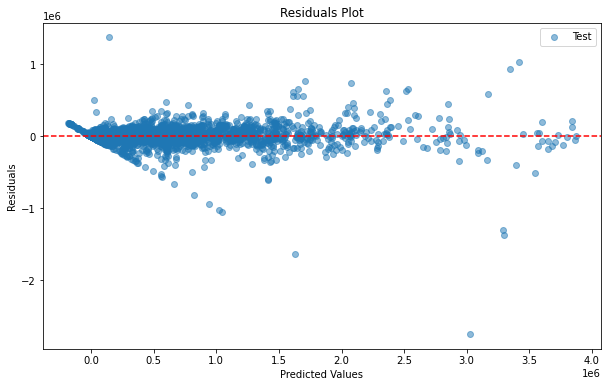

In [87]:
residuals_test = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, label='Test', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

#### Model Summary

- Of course, uncovering more details about crossings will help with the model. The Light GBM model can generate the general pattern with the given variables. Light GBM outperforms the ARIMA model (neither hypertuned). This emphasizes the fact that we can use these details to estimate the number of crossings across the US.
- While we were able to reduce the general RMSE, there is more than we can do to reduce the RMSE with the current variables.